In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random

### Loading data from SQL LITE Data Base

In [72]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
with sqlite3.connect('./transactions.db') as con:
    transaction = pd.read_sql_query("SELECT * from order_claim_ticket_v2", con)
    
transaction.columns

Index(['order_id', 'gender', 'title', 'given_name', 'middle_initial',
       'surname', 'street_address', 'city', 'state', 'zipcode', 'country',
       'country_full', 'email_address', 'username', 'password',
       'telephone_number', 'mothers_maiden', 'birthday', 'CC_type',
       'CC_number', 'cvv2', 'cc_expiration', 'national_id', 'color',
       'occupation', 'ref_domain', 'guid', 'latitude', 'longitude',
       'total_session_length', 'pageview_pre_purchase_visits', 'time_on_cart',
       'product_view_count', 'total_visit_clicks', 'fraud',
       'customer_credit_selection', 'payment_type', 'plan_type',
       'existing_ecom_customer', 'customer_id'],
      dtype='object')

In [73]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = transaction.select_dtypes(include=numerics)
newdf.describe()

,order_id,latitude,longitude,total_session_length,pageview_pre_purchase_visits,time_on_cart,product_view_count,total_visit_clicks,fraud,existing_ecom_customer,customer_id
count,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000
mean,12500.500,38.006,-91.417,25.008,69.996,10.008,5.011,30.030,0.002,0.299,57698397.500
std,7217.023,5.245,16.538,0.915,0.761,0.987,1.085,1.213,0.040,0.458,7217.023
min,1.000,9.027,-170.574,8.483,52.000,-8.669,1.000,12.000,0.000,0.000,57685898.000
25%,6250.750,34.036,-97.573,24.593,70.000,9.597,4.000,29.000,0.000,0.000,57692147.750
50%,12500.500,39.031,-87.425,25.055,70.000,10.149,5.000,30.000,0.000,0.000,57698397.500
75%,18750.250,41.650,-79.944,25.473,70.000,10.624,6.000,30.000,0.000,1.000,57704647.250
max,25000.000,70.475,145.790,32.207,77.000,14.400,16.000,44.000,1.000,1.000,57710897.000


<AxesSubplot:>

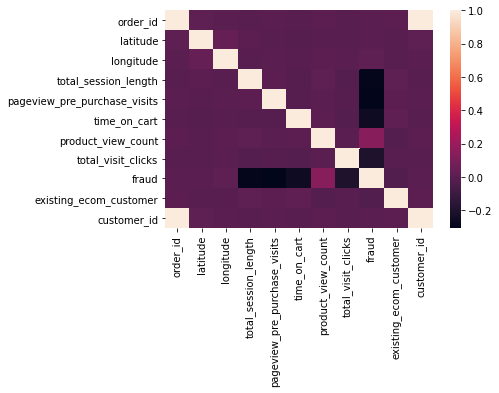

In [74]:
corr = newdf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [75]:
!cd
transaction.to_csv("./export.csv", sep=';', encoding='utf-8')

c:\Users\SP18-BSE-105.cui\Desktop\fraud-detection


In [76]:
%load_ext saspy.sas_magic

The saspy.sas_magic extension is already loaded. To reload it, use:
  %reload_ext saspy.sas_magic


In [77]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%IML  %%OPTMODEL  %%SAS  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl 

In [78]:
%%SAS
proc import datafile="./export.csv"
out=fraude dbms=dlm replace;
delimiter=";";
getnames=yes;
run;

proc import datafile="./export.csv"
out=validate dbms=dlm replace;
delimiter=";";
getnames=yes;
run;

Using SAS Config named: default


"this shouldn't happen"

## Exploratory Data Analysis with SAS

In [79]:
%%SAS
proc contents data=fraude;run;

Using SAS Config named: default


"this shouldn't happen"

In [80]:
%%SAS
proc freq data=fraude;
table fraud;
run;

Using SAS Config named: default


"this shouldn't happen"

In [81]:
%%SAS
proc freq data=fraude ; 
table fraud*(gender customer_credit_selection payment_type plan_type)/ missing nocum chisq ;
run;

Using SAS Config named: default


"this shouldn't happen"

In [82]:
%%SAS
proc means data=fraude mean max min median; 
class fraud;
var product_view_count time_on_cart total_session_length total_visit_clicks;
run;

Using SAS Config named: default


"this shouldn't happen"

In [83]:
%%SAS
title 'Analysis of Plating Thickness';
proc univariate data=fraude noprint;
class fraud;
   histogram product_view_count time_on_cart total_session_length total_visit_clicks;
run;

Using SAS Config named: default


"this shouldn't happen"

In [84]:
%%SAS
title 'Fish Measurement Data';
proc corr data=fraude nomiss plots=matrix(histogram) ;
   var product_view_count time_on_cart total_session_length total_visit_clicks;
run;

Using SAS Config named: default


"this shouldn't happen"

In [85]:
%%SAS
%macro rf(num, num2);
proc hpforest data=fraude
maxtrees= 500 vars_to_try=&num
seed=600 trainfraction=0.6
maxdepth=50 leafsize=6 alpha= 0.1;
target fraud
/level=nominal;
input product_view_count time_on_cart total_session_length total_visit_clicks
/level=interval;
input gender customer_credit_selection payment_type plan_type
/level=nominal;
ods output fitstatistics = fitstats&num2;
run;
%mend rf;

Using SAS Config named: default


"this shouldn't happen"

In [86]:
%%SAS
%rf(2,1);

Using SAS Config named: default


"this shouldn't happen"

In [87]:
%%SAS
%rf(3,2);

Using SAS Config named: default


"this shouldn't happen"

In [88]:
%%SAS
%rf(4,3);

Using SAS Config named: default


"this shouldn't happen"

In [89]:
%%SAS
proc sql;
create table ASE_groups as
select x.ntrees ,
x.predoob as ASE2vars_to_try,
y.predoob as ASE3vars_to_try,
z.predoob as ASE4vars_to_try
from fitstats1 x, fitstats2 y, fitstats3 z
where x.ntrees = y.ntrees
and x.ntrees = z.ntrees
and y.ntrees = z.ntrees;
run;

proc transpose data= ASE_groups out=ASE_groups1;
var ASE2vars_to_try ASE3vars_to_try ASE4vars_to_try;
run;
data ASE_groups2;
set ASE_groups1;
array RF(1:500) col1- col500;
do NTREES = 1 to 500;
ASE = RF(NTREES);
output;
end;
drop col1-col500 _LABEL_;
run;

Using SAS Config named: default


"this shouldn't happen"

In [90]:
%%SAS
proc sgplot data=ASE_groups2;
series x=NTREES y=ASE/ group = _name_ ;
title 'Average Square Error with Different Number of Variables to Try';
LABEL ASE = "Average Square Error"
NTREES = "Number of Trees"
_name_ = "Variables to Try Group";
run;

Using SAS Config named: default


"this shouldn't happen"

In [91]:
%%SAS
%macro rf2(num, num2);
proc hpforest data=fraude
maxtrees= 500 vars_to_try=4
seed=600 trainfraction=0.6
maxdepth=50 leafsize=&num. alpha= 0.1;
target fraud
/level=nominal;
input product_view_count time_on_cart total_session_length total_visit_clicks
/level=interval;
input gender customer_credit_selection payment_type plan_type
/level=nominal;
ods output fitstatistics = fitstats&num2.;
run;
%mend rf2;

Using SAS Config named: default


"this shouldn't happen"

In [92]:
%%SAS
%rf2(4,1);

Using SAS Config named: default


"this shouldn't happen"

In [93]:
%%SAS
%rf2(8,2);

Using SAS Config named: default


"this shouldn't happen"

In [94]:
%%SAS
%rf2(16,3);

Using SAS Config named: default


"this shouldn't happen"

## Plotting Average Square Error with Different Leaf Size Specifications

In [95]:
%%SAS
proc sql;
create table ASE_Leaf as
select x.ntrees ,
x.predoob as ASELeaf4,
y.predoob as ASELeaf8,
z.predoob as ASELeaf16
from fitstats1 x, fitstats2 y, fitstats3 z
where x.ntrees = y.ntrees
and x.ntrees = z.ntrees
and y.ntrees = z.ntrees;
run;
proc transpose data= ASE_Leaf out=ASE_Leaf1;
var ASELeaf4 ASELeaf8 ASELeaf16;
run;
data ASE_Leaf2;
set ASE_Leaf1;
array RF(1:500) col1- col500;
do NTREES = 1 to 500;
ASE = RF(NTREES);
output;
end;
drop col1-col500 _LABEL_;
run;

Using SAS Config named: default


"this shouldn't happen"

In [96]:
%%SAS
proc sgplot data=ASE_Leaf2;
series x=NTREES y=ASE/ group = _name_;
title 'Average Square Error with Different Leaf Size Groups';
LABEL ASE = "Average Square Error"
NTREES = "Number of Trees"
_name_ = "Leaf Size Groups";
run;

Using SAS Config named: default


"this shouldn't happen"

## Modelisation on the train dataset

In [97]:
%%SAS
proc hpforest data=fraude
maxtrees= 500 vars_to_try=4
seed=600 trainfraction=0.6
maxdepth=50 leafsize=4 alpha= 0.1;
target fraud
/level=nominal;
input product_view_count time_on_cart total_session_length total_visit_clicks
/level=interval;
input gender customer_credit_selection payment_type plan_type
/level=nominal;
ods output fitstatistics = fitstatstest;
save file = "/tmp/modele.bin";
run;

Using SAS Config named: default


"this shouldn't happen"

## Apply the model on validate dataset and display confusion matrix

In [101]:
%%SAS
proc hp4score data=validate;
id order_id;
score file= "modele.bin"
out=scored;
run;

Using SAS Config named: default


"this shouldn't happen"

In [99]:
%%SAS
proc sort data=fraude;by order_id;run;
proc sort data=scored;by order_id;run;

data matrix;
merge scored (in=info)
      fraude (in=base);
by order_id;
if base and info;
run;

Using SAS Config named: default


"this shouldn't happen"

In [100]:
%%SAS
proc freq data=scored ;
table fraud*I_fraud/norow nocol nocum;run;

Using SAS Config named: default


"this shouldn't happen"